In [9]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [11]:
import pandas as pd

wine_features = wine.data
wine_labels = wine.target

df_wine = pd.DataFrame(wine_features, columns=wine.feature_names)
df_wine['label'] = wine_labels
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_wine, test_size=0.3, random_state=0, stratify=df_wine['label'])

X_train = train[train.columns[:13]]
y_train = train[train.columns[13]]

X_test = test[test.columns[:13]]
y_test = test[test.columns[13]]

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train) # 문제지와 정답지로 학습 (공부하는 것)

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

pred_knn = model.predict(X_test) # 공부한 내용을 평가(test)
pred_rfc = rfc_model.predict(X_test)

accuracy = metrics.accuracy_score(pred_knn, y_test) # 평가한 내용 채점
rfc_accuracy = metrics.accuracy_score(pred_rfc, y_test)

print(f'KNN 알고리즘 분류 정확도: {accuracy}')
print(f'Random Forest 알고리즘 분류 정확도: {rfc_accuracy}')

KNN 알고리즘 분류 정확도: 0.7222222222222222
Random Forest 알고리즘 분류 정확도: 1.0


### 머신러닝 절차
1. 데이터 확인
2. 훈련 데이터와 평가 데이터 나누기(train_test_split()함수 사용)
3. 문제지(feature, attribute, X)와 정답지(target, label, class, y) 나누기
4. 데이터 분석에 적합한 모델(알고리즘) 선택
5. 학습
6. 평가
7. 환류: 결과 보고
8. 정확도가 가장 높은 모델을 저장해서 서비스에 활용 


In [43]:
# 1. 데이터 확인
X, y = load_wine(return_X_y=True)
# 2, 3 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88, stratify=y)
# 4. 모델 선택
model = RandomForestClassifier()
# 5. 학습
model.fit(X_train, y_train)
# 6. 평가
pred_rfc = model.predict(X_test)
# 7. 환류
rfc_accuracy = metrics.accuracy_score(pred_rfc, y_test)
print(f'{rfc_accuracy}')

0.9814814814814815


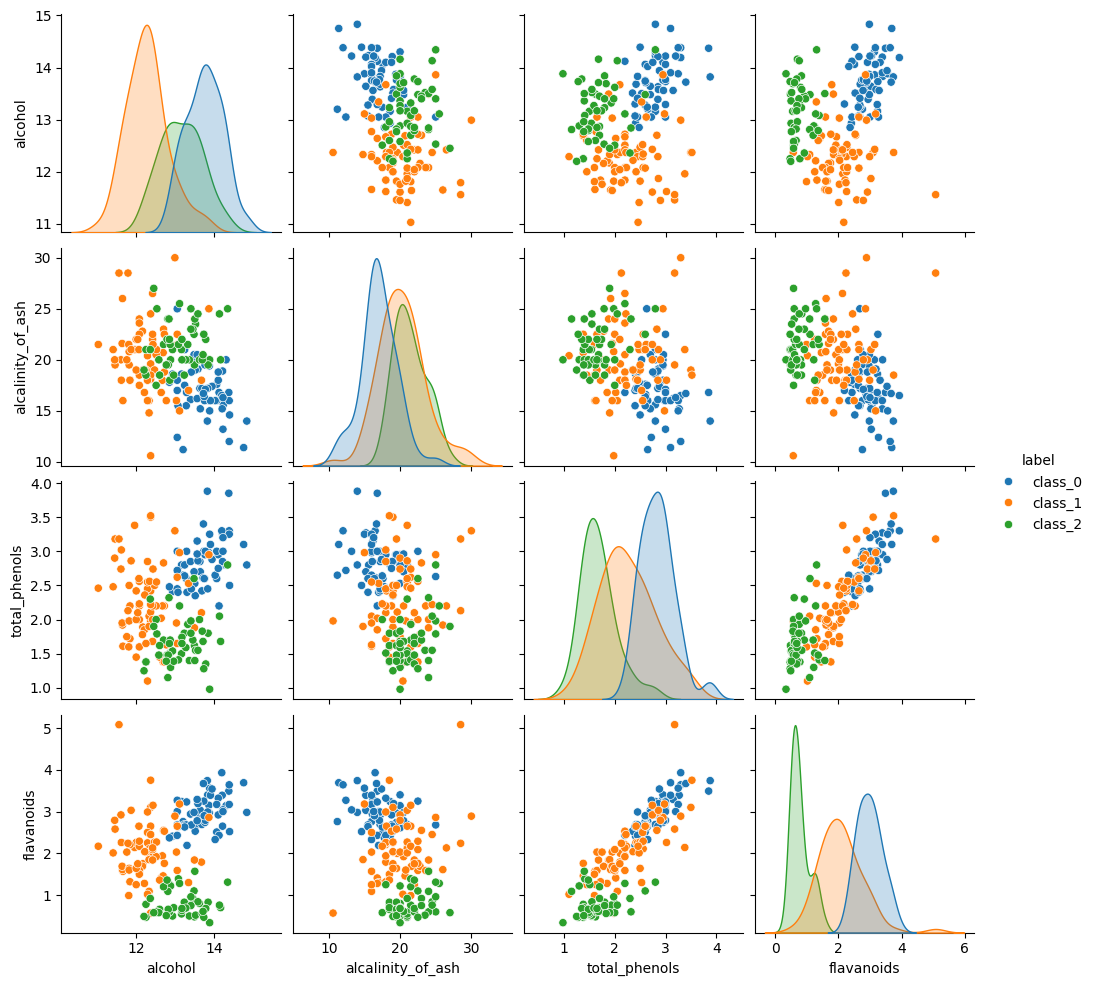

In [44]:
import seaborn as sns

df_analysis = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_class = pd.Series(wine.target, dtype='category')
wine_class = wine_class.cat.rename_categories(wine.target_names)
df_analysis['label'] = wine_class

sns.pairplot(vars=['alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids'], hue='label', data=df_analysis)

In [56]:
# scikit learn에서 제공하는 붓꽃 데이터를 통해 붗꽃을 분류하세요.
# 모델은 SVC(support vector machine classifier)로 분류
from sklearn.datasets import load_iris
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = SVC()
model.fit(X_train, y_train)

pred_svc = model.predict(X_test)
svc_accuracy = metrics.accuracy_score(pred_svc, y_test)
print(f'SVC 정확도: {svc_accuracy}')


SVC 정확도: 0.9555555555555556
